# Linear regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from scipy.stats import pearsonr
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Reading data after dimensionality reduction with PCA
X_train = pd.read_csv(filepath_or_buffer='x_train_pca.csv', header=None)
y_train = pd.read_csv(filepath_or_buffer='y_train.csv')
X_test = pd.read_csv(filepath_or_buffer='x_test_pca.csv', header=None)
y_test = pd.read_csv(filepath_or_buffer='y_test.csv')

In [3]:
# Regression
regressor_pca = LinearRegression() 
regressor_pca.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
# Prediction
y_pred = regressor_pca.predict(X_test)

In [5]:
# RMSE
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE: 0.5369722541714329


C:\Users\Asel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


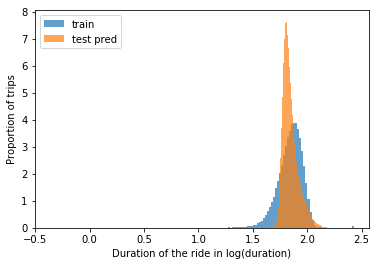

In [14]:
# Using log to plot distribution of the training and predicted duration
plt.hist(np.log(y_train), bins=150, alpha=0.7, label='train', normed=True)
plt.hist(np.log(y_pred), bins=150, alpha=0.7, label='test pred', normed=True)
plt.xlabel('Duration of the ride in log(duration)')
plt.ylabel('Proportion of trips')
plt.legend(loc='upper left')
plt.show()

#### Determine linear correlation of features with target

In [12]:
#X_train = X_train.loc[:,:].values
#y_train = y_train.loc[:,:].values
#X_test = X_test.loc[:,:].values
#y_test = y_test.loc[:,:].values

data = pd.DataFrame(np.concatenate((X_train,y_train.reshape(len(y_train),1)),axis=1))
data.columns = data.columns.astype(str)

features = data.iloc[:,:10].columns.tolist()
target = data.iloc[:,10].name

correlations = {}
for f in features:
    d = data[[f,target]]
    ff = d[f].values
    t = d[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(ff,t)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
0 vs 10,0.641579
3 vs 10,-0.122440
1 vs 10,-0.100100
8 vs 10,-0.082616
9 vs 10,-0.039645
2 vs 10,0.034756
4 vs 10,-0.014976
5 vs 10,-0.013797
6 vs 10,0.003815
7 vs 10,0.003718


#### Cross validating

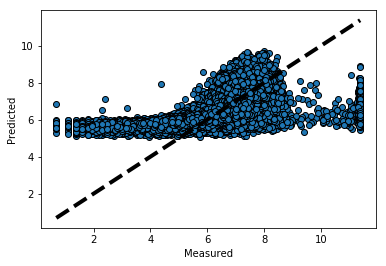

In [13]:
predicted = cross_val_predict(regressor_pca, X_test, y_test, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()